In [1]:
import numpy as np
# install ucimlrepo, pandas, matplotlib packages

from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 

# shape of data
x.shape, y.shape

((48842, 14), (48842, 1))

In [3]:
# look for null values, data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [4]:
# look for null values, data types
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [5]:
import pandas as pd

In [6]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32055,34,Private,331126,HS-grad,9,Never-married,Other-service,Unmarried,Black,Male,0,0,30,United-States,<=50K
41519,53,Private,183668,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3464,0,34,United-States,<=50K.
41703,27,Private,173927,Some-college,10,Never-married,Tech-support,Own-child,Other,Female,0,0,32,Jamaica,<=50K.


In [7]:
df.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(48813, 15)

In [9]:
x = df.drop(columns=['income'])
y = df['income']

<Axes: xlabel='income'>

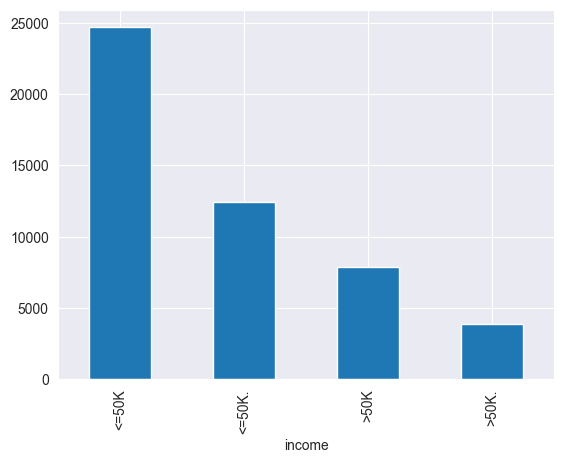

In [10]:
y.value_counts().plot(kind = 'bar')

In [11]:
from imblearn.over_sampling import RandomOverSampler

<Axes: xlabel='income'>

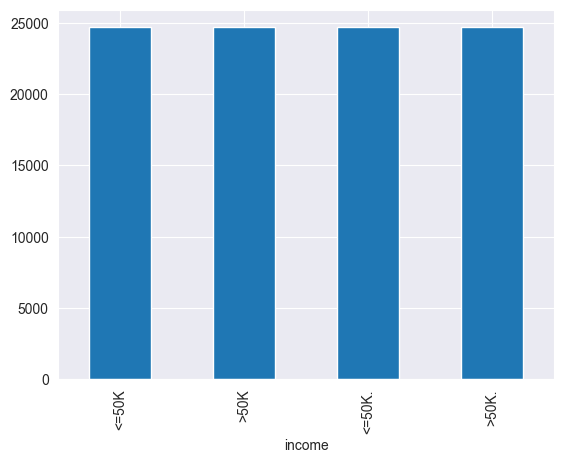

In [12]:
oversample = RandomOverSampler(random_state=42)
x, y = oversample.fit_resample(x, y)
y.value_counts().plot(kind = 'bar')

In [13]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
34736,42,Private,233366,5th-6th,3,Married-civ-spouse,Craft-repair,Husband,Other,Male,3103,0,40,Mexico,>50K.
19248,40,Self-emp-inc,92036,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
19455,48,Private,148995,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K


In [14]:
# view unique values with value counts
df['income'].value_counts()

income
<=50K     24698
>50K      24698
<=50K.    24698
>50K.     24698
Name: count, dtype: int64

In [15]:
def process_income(income):
    if income == '>50K.':
        return 1
    elif income == '<=50K.':
        return 0
    elif income == '>50K':
        return 1
    elif income == '<=50K':
        return 0
    
df['income'] = df['income'].apply(process_income)
df['income'].value_counts()

income
0    49396
1    49396
Name: count, dtype: int64

In [16]:
import seaborn as sns

<Axes: >

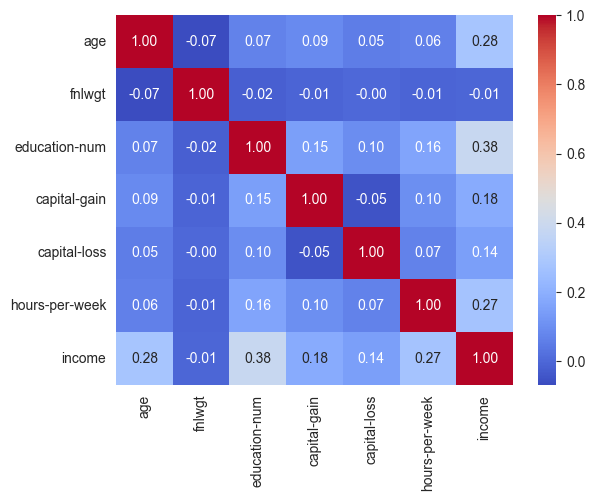

In [17]:
neumerical_features = df.select_dtypes(include=['int64'])
corr_metrics = neumerical_features.corr()
sns.heatmap(corr_metrics, annot=True, fmt='.2f', cmap='coolwarm')

In [18]:
df['age'].describe()

count    98792.000000
mean        40.575239
std         13.015335
min         17.000000
25%         31.000000
50%         40.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64

In [19]:
from matplotlib import pyplot as plt

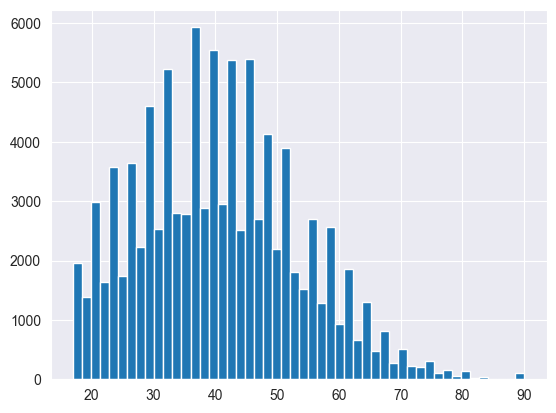

In [20]:
plt.hist(df['age'], bins=50)
plt.show()

In [22]:
age_filter_1 = df['age'] > 80
df.loc[age_filter_1]['age'].value_counts()

age
90    109
81     74
83     21
82     19
84     18
88     13
85     11
89      5
87      4
86      1
Name: count, dtype: int64

In [23]:
age_filter_2 = df['age'] > 85
age_filter_3 = df['age'] < 90
df.loc[age_filter_2 & age_filter_3, 'age'] = int((85 + 90)/ 2)
df.loc[age_filter_1]['age'].value_counts()

age
90    109
81     74
87     23
83     21
82     19
84     18
85     11
Name: count, dtype: int64

In [24]:
df['workclass'].isnull().sum()

2259

In [25]:
df['workclass'] = df['workclass'].fillna('Unknown')

In [26]:
df['workclass'].value_counts()

workclass
Private             66420
Self-emp-not-inc     8247
Local-gov            6861
Self-emp-inc         5011
State-gov            4192
Federal-gov          3565
Unknown              2259
?                    2191
Without-pay            35
Never-worked           11
Name: count, dtype: int64

In [27]:
workclass_filt_1 = df['workclass'] == 'Without-pay'
workclass_filt_2 = df['workclass'] == 'Never-worked'

df.loc[workclass_filt_1 | workclass_filt_2, 'income'].value_counts()

income
0    36
1    10
Name: count, dtype: int64

In [28]:
def process_workclass(workclass):
    if workclass == '?':
        return 'Unknown'
    elif workclass in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    else:
        return workclass
    
df['workclass'] = df['workclass'].apply(process_workclass)
df['workclass'].value_counts()

workclass
Private             66420
Self-emp-not-inc     8247
Local-gov            6861
Self-emp-inc         5011
Unknown              4450
State-gov            4192
Federal-gov          3565
Unemployed             46
Name: count, dtype: int64

In [29]:
df['education'].value_counts()

education
HS-grad         28174
Some-college    20402
Bachelors       20254
Masters          7746
Assoc-voc        4258
Assoc-acdm       3396
Prof-school      2781
11th             2747
10th             2134
Doctorate        2059
7th-8th          1480
9th              1128
12th             1008
5th-6th           777
1st-4th           327
Preschool         121
Name: count, dtype: int64

In [30]:
filt_preschool = (df['education'] == 'Preschool')
df.loc[filt_preschool, 'income'].value_counts()

income
0    113
1      8
Name: count, dtype: int64

In [31]:
filt_1_4 = df['education'] == '1st-4th'
df.loc[filt_1_4, 'income'].value_counts()

income
0    299
1     28
Name: count, dtype: int64

In [32]:
def process_education(education):
    if education in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Other'
    else:
        return education

df['education'] = df['education'].apply(process_education)

In [33]:
df['education-num'].value_counts()

education-num
9     28174
10    20402
13    20254
14     7746
11     4258
12     3396
15     2781
7      2747
6      2134
16     2059
4      1480
5      1128
8      1008
3       777
2       327
1       121
Name: count, dtype: int64

In [34]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       58804
Never-married            23438
Divorced                 10703
Widowed                   2424
Separated                 2302
Married-spouse-absent     1032
Married-AF-spouse           89
Name: count, dtype: int64

In [35]:
filt_af_spouse = df['marital-status'] == 'Married-AF-spouse'
df.loc[filt_af_spouse, 'income'].value_counts()

income
1    53
0    36
Name: count, dtype: int64

In [36]:
df['occupation'].isnull().sum()

2263

In [37]:
df['occupation'] = df['occupation'].fillna('Unknown')

In [38]:
df['occupation'].value_counts()

occupation
Exec-managerial      16545
Prof-specialty       16266
Craft-repair         12056
Sales                11628
Adm-clerical          9699
Other-service         7134
Machine-op-inspct     5074
Transport-moving      4426
Handlers-cleaners     3225
Tech-support          3192
Farming-fishing       2524
Unknown               2263
?                     2198
Protective-serv       2179
Priv-house-serv        339
Armed-Forces            44
Name: count, dtype: int64

In [39]:
df['occupation'] = df['occupation'].apply(lambda x : 'Unknown' if x == '?' else x)

In [40]:
filt_af = df['occupation'] == 'Armed-Forces'
df.loc[filt_af, 'income'].value_counts()

income
1    32
0    12
Name: count, dtype: int64

In [41]:
df['relationship'].value_counts()

relationship
Husband           51926
Not-in-family     20346
Own-child         10426
Unmarried          7651
Wife               6291
Other-relative     2152
Name: count, dtype: int64

In [42]:
filt_unmarried = df['relationship'] == 'Unmarried'
df.loc[filt_unmarried, 'marital-status'].value_counts()

marital-status
Divorced                 3677
Never-married            1803
Separated                 998
Widowed                   897
Married-spouse-absent     276
Name: count, dtype: int64

In [43]:
df['race'].value_counts()

race
White                 86355
Black                  7820
Asian-Pac-Islander     3124
Amer-Indian-Eskimo      779
Other                   714
Name: count, dtype: int64

In [44]:
df['sex'].value_counts()

sex
Male      72078
Female    26714
Name: count, dtype: int64

In [45]:
df['capital-gain'].describe()

count    98792.000000
mean      2108.506094
std      10689.223859
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [46]:
(df['capital-loss'] == 0).sum()

92450

{'whiskers': [<matplotlib.lines.Line2D at 0x15f394280>,
 'caps': [<matplotlib.lines.Line2D at 0x15f394a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f60a730>],
 'medians': [<matplotlib.lines.Line2D at 0x15f394160>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f627460>],
 'means': []}

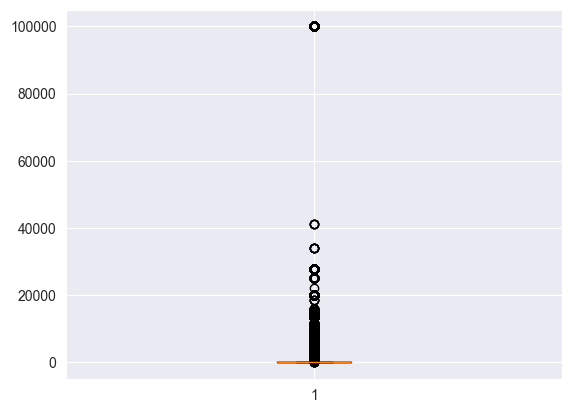

In [47]:
plt.boxplot(df['capital-gain'])

In [48]:
filt_cp_gain_out = df['capital-gain'] > 80000
df['capital-gain'] = np.where(filt_cp_gain_out, np.mean(df[~filt_cp_gain_out]['capital-gain']), df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15f5793a0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f579c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f579640>],
 'medians': [<matplotlib.lines.Line2D at 0x15f6fc460>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f6fc9a0>],
 'means': []}

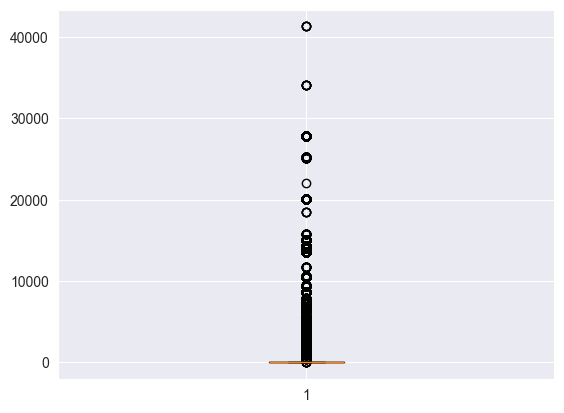

In [49]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15f816e20>,
 'caps': [<matplotlib.lines.Line2D at 0x15f8273a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f8097f0>],
 'medians': [<matplotlib.lines.Line2D at 0x15f8277c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f827a60>],
 'means': []}

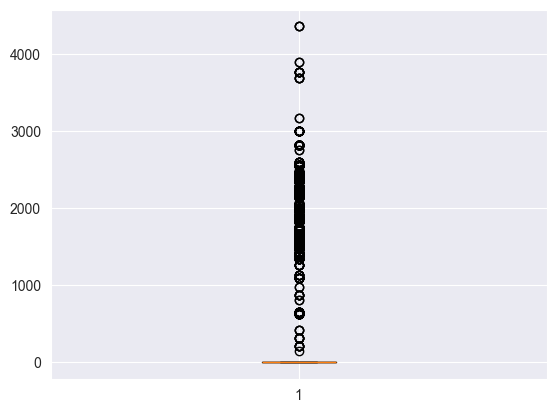

In [50]:
plt.boxplot(df['capital-loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15f5e81c0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f3920a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f6510a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15f833760>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f839040>],
 'means': []}

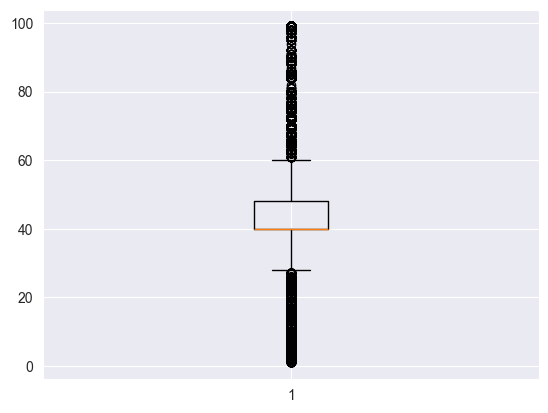

In [51]:
plt.boxplot(df['hours-per-week'])

In [52]:
df['race'].value_counts()

race
White                 86355
Black                  7820
Asian-Pac-Islander     3124
Amer-Indian-Eskimo      779
Other                   714
Name: count, dtype: int64

In [53]:
df['hours-per-week'].describe()

count    98792.000000
mean        42.112570
std         12.235764
min          1.000000
25%         40.000000
50%         40.000000
75%         48.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [54]:
df['native-country'].isnull().sum()

858

In [55]:
df['native-country'] = df['native-country'].fillna('Other')

In [56]:
df['native-country'].value_counts()

native-country
United-States                 89348
Mexico                         1340
?                               923
Other                           858
Philippines                     633
Canada                          420
Germany                         413
India                           392
England                         318
Puerto-Rico                     307
Cuba                            276
China                           262
El-Salvador                     242
Italy                           223
Japan                           214
South                           201
Jamaica                         170
Poland                          168
Dominican-Republic              158
Taiwan                          155
Iran                            141
Portugal                        134
Greece                          134
Columbia                        130
Haiti                           126
Vietnam                         125
Guatemala                       113
France       

In [57]:
df['native-country'] = df['native-country'].apply(lambda x: 'Other' if x == '?' else x)

In [58]:
filt_n_country = df['native-country'].value_counts()
classes_to_replace = filt_n_country[filt_n_country < 50].index
df.loc[df['native-country'].isin(classes_to_replace), 'native-country'] = 'Other'
df['native-country'].value_counts()

native-country
United-States         89348
Other                  2053
Mexico                 1340
Philippines             633
Canada                  420
Germany                 413
India                   392
England                 318
Puerto-Rico             307
Cuba                    276
China                   262
El-Salvador             242
Italy                   223
Japan                   214
South                   201
Jamaica                 170
Poland                  168
Dominican-Republic      158
Taiwan                  155
Iran                    141
Greece                  134
Portugal                134
Columbia                130
Haiti                   126
Vietnam                 125
Guatemala               113
France                  101
Ireland                  92
Peru                     76
Ecuador                  75
Nicaragua                71
Cambodia                 67
Hong                     58
Yugoslavia               56
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98792 entries, 0 to 98791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             98792 non-null  int64  
 1   workclass       98792 non-null  object 
 2   fnlwgt          98792 non-null  int64  
 3   education       98792 non-null  object 
 4   education-num   98792 non-null  int64  
 5   marital-status  98792 non-null  object 
 6   occupation      98792 non-null  object 
 7   relationship    98792 non-null  object 
 8   race            98792 non-null  object 
 9   sex             98792 non-null  object 
 10  capital-gain    98792 non-null  float64
 11  capital-loss    98792 non-null  int64  
 12  hours-per-week  98792 non-null  int64  
 13  native-country  98792 non-null  object 
 14  income          98792 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 11.3+ MB


In [60]:
from sklearn.decomposition import PCA

In [61]:
filt_pca = df[['fnlwgt', 'capital-gain', 'capital-loss']]

In [62]:
pca = PCA(n_components= 1)
pca_components = pca.fit_transform(filt_pca)

In [63]:
pca_components

array([[-111796.44382001],
       [-106001.57563477],
       [  26333.42412173],
       ...,
       [ -14080.57580391],
       [  83163.42401716],
       [  88334.42400764]])

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
pca_components = sc.fit_transform(pca_components)

In [66]:
df = df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'])
x = df.drop(columns=['income'])
x['pca'] = pca_components
y = df['income']

In [67]:
x = pd.get_dummies(x)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_train.shape, x_test.shape

((59275, 90), (39517, 90))

In [72]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [73]:
bernouli_model = BernoulliNB()
bernouli_model.fit(x_train,y_train)
pred = bernouli_model.predict(x_test)
accuracy_score(y_test,pred)

0.7734645848622111

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'force_alpha': [True, False],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.6, 0.4], [0.4, 0.6]]
}

In [76]:
grid_search_bernouli = GridSearchCV(estimator = bernouli_model, param_grid = param_grid)
grid_search_bernouli.fit(x_train,y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'binarize': [0.0, 0.5, 1.0],
                         'class_prior': [None, [0.5, 0.5], [0.6, 0.4],
                                         [0.4, 0.6]],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [77]:
grid_search_bernouli.best_params_

{'alpha': 0.1,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': False,
 'force_alpha': True}

In [78]:
grid_search_bernouli.score(x_test,y_test)

0.7734392792975175

In [79]:
y_pred = grid_search_bernouli.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test, y_pred)

array([[14200,  5611],
       [ 3342, 16364]])

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     19811
           1       0.74      0.83      0.79     19706

    accuracy                           0.77     39517
   macro avg       0.78      0.77      0.77     39517
weighted avg       0.78      0.77      0.77     39517


In [86]:
from sklearn.metrics import roc_curve

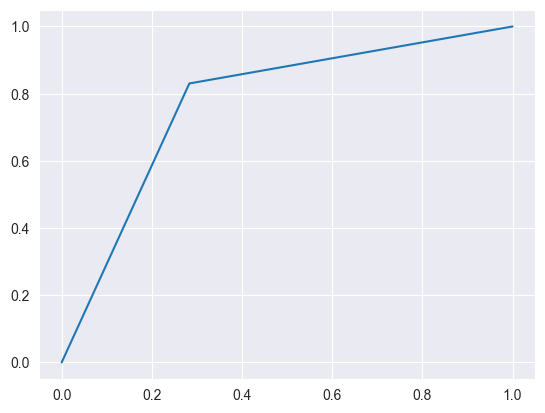

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [88]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'Accuracy')

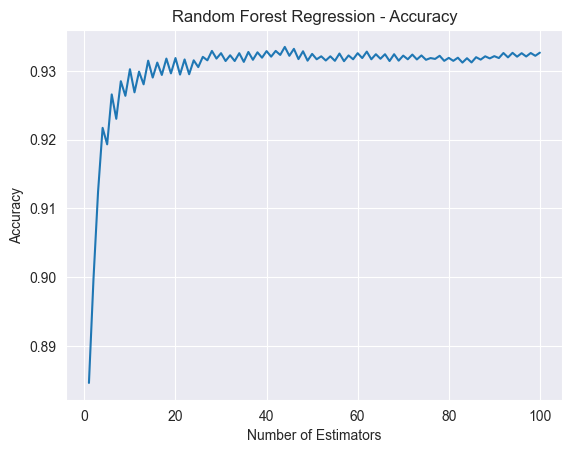

In [89]:
test_acc_list = []

for i in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(x_train, y_train)
    
    # testing set
    test_pred = rf_model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

plt.plot(range(1, 101), test_acc_list)
plt.title('Random Forest Regression - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

In [90]:
rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(x_train, y_train)
test_pred = rf_model.predict(x_test)
accuracy_score(y_test, test_pred)

0.9328643368676772

In [91]:
param_grid = {
    'n_estimators': [40],
    'random_state': [42],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

In [92]:
grid_search_rf = GridSearchCV(estimator = rf_model,param_grid = param_grid)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=40, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'n_estimators': [40],
                         'random_state': [42], 'warm_start': [True, False]})

In [93]:
grid_search_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'n_estimators': 40,
 'random_state': 42,
 'warm_start': True}

In [94]:
grid_search_rf.score(x_test,y_test)

0.9360275324543867

In [95]:
y_pred = grid_search_rf.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test, y_pred)

array([[17987,  1824],
       [  704, 19002]])

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     19811
           1       0.91      0.96      0.94     19706

    accuracy                           0.94     39517
   macro avg       0.94      0.94      0.94     39517
weighted avg       0.94      0.94      0.94     39517


In [102]:
from sklearn.metrics import roc_curve

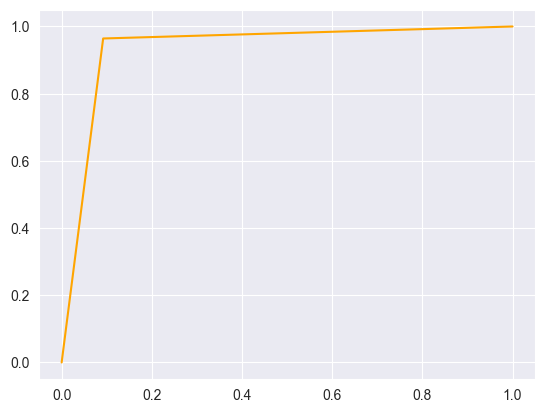

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')